# Data

We have used as our database the prices of all securities of the SBF 120: the index comprising the 120 largest market capitalizations on Euronext Paris, from 12/16/2021 to 12/16/2022. Due to some conversion issues, we removed a few securities to arrive to a total of 114 securities in our database

# Data processing

In [1]:
#Importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
#Importing the CSV file using pandas
data = pd.read_csv('/Users/karen/Desktop/Base SBF120 F.csv',delimiter = ";" )


In [3]:
#Checking the completeness of the database
data.isna().sum()

Date                   0
ACCOR                  0
CREDIT AGRICOLE        0
AEROPORTS DE PARIS     0
AIR FRANCE - KLM       0
                      ..
VALNEVA                0
VERALLIA               0
WORLDLINE              0
SOLVAY                 0
SBF 120                0
Length: 116, dtype: int64

In [4]:
#Setting the date as the index of the database and deleting the 'date' column
data = data.set_index(data['Date'], drop=False, append=False, inplace=False, verify_integrity=False).drop('Date', 1)
#Converting a database from text to a floating point format
data = data.astype(float)
data

/var/folders/6n/7v6v54gs5h71_6t_fs54yzsm0000gp/T/ipykernel_45739/1013683803.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.set_index(data['Date'], drop=False, append=False, inplace=False, verify_integrity=False).drop('Date', 1)


,ACCOR,CREDIT AGRICOLE,AEROPORTS DE PARIS,AIR FRANCE - KLM,L'AIR LIQUIDE,Airbus,ARKEMA,ALD,ALSTOM,ALTAREA SC,...,TotalEnergies,VEOLIA ENVIRONNEMENT,VIRBAC,VIVENDI,VALLOUREC,VALNEVA,VERALLIA,WORLDLINE,SOLVAY,SBF 120
Date,,,,,,,,,,,,,,,,,,,,,
12/16/2021,25.95,12.20,105.05,3.74,140.65,102.40,119.95,12.76,29.62,153.8,...,44.68,31.65,425.0,11.29,8.92,25.98,29.82,47.34,98.70,5421.39
12/17/2021,26.42,12.01,108.05,3.81,138.91,104.14,120.20,12.74,29.09,154.8,...,43.66,31.54,418.0,11.29,8.77,25.84,30.00,49.12,98.92,5368.57
12/20/2021,26.38,11.90,107.90,3.77,136.05,102.06,117.90,12.50,28.74,151.0,...,43.37,31.31,413.0,11.24,8.53,25.60,29.62,45.84,97.36,5322.34
12/21/2021,27.44,12.17,109.70,3.94,136.22,106.80,119.65,12.66,29.82,155.0,...,44.40,31.56,418.5,11.75,8.74,24.52,30.12,48.02,99.24,5397.23
12/22/2021,27.87,12.25,110.95,3.96,136.67,111.08,120.55,12.72,30.24,156.4,...,44.71,31.77,425.5,11.86,8.66,26.02,30.30,48.63,100.00,5464.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/12/2022,25.04,9.57,134.70,1.27,136.20,112.10,82.96,10.92,23.76,132.0,...,56.62,24.74,246.5,8.91,10.43,6.72,30.62,41.33,92.84,5099.24
12/13/2022,25.55,9.70,132.05,1.27,138.20,113.48,86.42,10.90,24.24,134.0,...,57.89,25.12,250.5,8.94,10.76,6.71,30.98,41.57,95.22,5170.91
12/14/2022,25.21,9.67,130.50,1.26,138.16,113.00,85.76,11.02,23.98,133.4,...,57.48,25.39,247.0,8.93,10.94,6.76,31.46,40.91,94.94,5162.59


In [5]:
#Calculating the log returns of the stocks in the database
data_log = np.log(data)-np.log(data.shift(1))
#Deleting rows with missing data
data_log = data_log.dropna()

In [6]:
#Displaying the database
print(data_log.head())
print(data_log.tail())

               ACCOR  CREDIT AGRICOLE   AEROPORTS DE PARIS   AIR FRANCE - KLM  \
Date                                                                            
12/17/2021  0.017950         -0.015696             0.028158          0.018544   
12/20/2021 -0.001515         -0.009201            -0.001389         -0.010554   
12/21/2021  0.039396          0.022436             0.016544          0.044106   
12/22/2021  0.015549          0.006552             0.011330          0.005063   
12/23/2021  0.009286          0.015391             0.013429          0.000000   

            L'AIR LIQUIDE   Airbus    ARKEMA       ALD    ALSTOM   ALTAREA SC  \
Date                                                                            
12/17/2021      -0.012448  0.016849  0.002082 -0.001569 -0.018055    0.006481   
12/20/2021      -0.020804 -0.020175 -0.019320 -0.019018 -0.012105   -0.024854   
12/21/2021       0.001249  0.045397  0.014734  0.012719  0.036889    0.026145   
12/22/2021       0.003298  

# Stability of Beta

In [7]:
#Retrieving relevant variables for the next steps, the number of stocks in the database and the number of observations
NbAction = len(data_log.columns)-1
NbDate = len(data_log.index)

print(NbAction,NbDate)

114 246


In [8]:
#Determining the dimensions of the database
data_log.shape

(246, 115)

1 .Select 10 securities at random. For each of the n = 10 securities, estimate by the OLS
regression : rit = αi + βirmt + eit with the t = 1, ... , 40 first observations. The estimated model
is noted
𝑟𝑖𝑡 = 𝛼̂𝑖 + 𝛽̂
𝑖𝑟𝑚𝑡 + 𝑒̂𝑖𝑡 ,𝑡 = 1, … , 40
 We note βi,40 is the βi of asset i obtained from the 40 first observations.

In [9]:
#Choosing the number of stocks to randomly select, here 10
NbActionAlea = 10

In [10]:
#Calculating the market return
ReturnMarket = (data_log.iloc[40,-1:]-data_log.iloc[0,-1:])/data_log.iloc[0,-1:]
ReturnMarket

SBF 120   -2.867784
dtype: float64

In [11]:
###Initializing the various matrices/lists necessary for the calculations

# Retrieving the names of the randomly selected securities in a list
NomActionAlea = []

# Retrieving the indexes of the randomly selected stocks in a dataframe
IdxActionAlea = np.zeros((NbActionAlea))

#Retrieving the calculated betas of the randomly selected stocks
BetaActionAlea = np.zeros((NbActionAlea))

# Retrieving the Alphas calculated from the titles drawn with fate
AlphaActionAlea = np.zeros((NbActionAlea))

#Retrieving the estimated returns of the securities with the calculations of the Alphas and Betas
EstimateReturn = np.zeros((NbActionAlea))

#Retrieving the real returns on securities
RealReturn = np.zeros((NbActionAlea))

#Retrieving the returns of the portfolio
ResiduActionAlea = np.zeros((40,NbActionAlea))
#ResiduActionAlea = pd.DataFrame(0,index = range(1,41), columns = range(1,NbActionAlea))

#Variance matrix of residuals per share
VarianceResidu = np.zeros((NbActionAlea))

#Creation of the list of available random numbers
NombreDispo = list(range(NbAction))



In [12]:
#Loop on the number of shares chosen
for i in range(NbActionAlea):
    
    #We draw a random integer from 0 to the number of shares available
    NbAlea = random.choice(NombreDispo)
    NombreDispo.remove(NbAlea)
    #We add the random index to our dataframe
    IdxActionAlea[i] = NbAlea
    #We add the name of the action to our list
    NomActionAlea.append(data_log.columns[NbAlea])
    
    #We assign to y the column of the action drawn at random
    y = data_log.iloc[:40,NbAlea]
    #We assign to x the column of index
    x = data_log.iloc[:40,-1:]
    #Addition of a column to the df (necessary for the calculation of the regression constant)
    x=sm.add_constant(x)
    
    #Regression
    regall=sm.OLS(y,x).fit()
    #Retrieving the alpha and beta of the title 
    AlphaActionAlea[i], BetaActionAlea[i] = regall.params
    #Retreive the residual
    ResiduActionAlea[:,i]=regall.resid
    #Compute the variance of stock's residual
    VarianceResidu[i]=np.var(ResiduActionAlea[:,i])


In [13]:
#Transformation of the array into a dataframe with right index and columns

dfResiduActionAlea = pd.DataFrame(ResiduActionAlea)
dfResiduActionAlea.columns=NomActionAlea
dfResiduActionAlea.index=data_log.iloc[:40,:].index
dfResiduActionAlea

,ORPEA,TRIGANO,REXEL,ELIS,COMPAGNIE GENERALE DES ETABLISSEMENTS MICHELIN,BOUYGUES,OVH GROUPE,TELEVISION FRANCAISE 1,ACCOR,SOCIETE GENERALE
Date,,,,,,,,,,
12/17/2021,0.047853,0.011411,-0.001094,0.009019,0.002760,0.014309,0.015150,0.004096,0.021192,-0.014931
12/20/2021,-0.005322,-0.011137,-0.014639,-0.016105,-0.011650,-0.014364,0.024329,0.010385,0.000586,-0.004123
12/21/2021,0.055586,0.009356,-0.000411,0.014042,0.013912,-0.000804,-0.006663,-0.000163,0.018900,0.004116
12/22/2021,0.025069,0.006614,-0.000459,-0.000509,0.002764,-0.003776,0.054033,-0.004984,-0.003342,-0.009034
12/23/2021,0.007618,0.009164,-0.004070,0.009514,0.002237,0.006082,0.005701,0.002595,-0.004659,-0.000592
12/24/2021,0.022449,-0.016881,-0.015929,-0.002186,0.003023,0.002933,-0.006353,-0.009652,-0.000364,0.001747
12/27/2021,0.012547,-0.003021,-0.000190,-0.018770,-0.000357,-0.004845,0.002089,-0.008594,-0.004434,-0.011314
12/28/2021,0.025695,-0.000499,-0.003093,0.001571,-0.005645,-0.002223,0.018741,-0.000709,-0.014411,-0.005928
12/29/2021,0.032282,0.019280,0.008681,0.009857,0.003261,0.007383,0.019130,0.008541,-0.008866,0.002683


In [14]:
#All the indexes taken randomly
print(IdxActionAlea)
#Their respectives names
print(NomActionAlea)
#Their Beta
print(BetaActionAlea)
#Their Alpha
print(AlphaActionAlea)
#Their Residual Variance
print(VarianceResidu)


[ 75. 104.  84.  37.  66.  38.  76. 103.   0.  51.]
['ORPEA', 'TRIGANO ', 'REXEL ', 'ELIS', 'COMPAGNIE GENERALE DES ETABLISSEMENTS MICHELIN ', 'BOUYGUES', 'OVH GROUPE ', 'TELEVISION FRANCAISE 1', 'ACCOR', 'SOCIETE GENERALE ']
[-0.14993698  0.81439953  1.40345588  0.83219248  0.83622502  0.41736915
  0.86870462  0.61683502  0.99892774  1.25428548]
[-0.01956594  0.00086385  0.0055373   0.00407763  0.00138944  0.00189472
  0.00237508  0.00194277  0.0065379   0.00445129]
[4.58608757e-03 2.54751716e-04 3.29692149e-04 1.63803663e-04
 8.65012424e-05 4.99682072e-05 9.64166846e-04 2.87891111e-04
 1.62491789e-04 2.20849611e-04]


2. Estimate the same regression for the equally weighted portfolio of n = 10 securities

In [15]:
#Creation of an empty list to retrieve daily portfolio returns
DailyReturnPtf = []
#Initialization of summing the returns of the securities 
SumReturn = 0
MeanReturn = 0
#First, we loop on the dates
for i in range(NbDate):
    #Reset of the variable
    SumReturn = 0
    MeanReturn = 0
    #We then loop on the titles selected at random
    for j in IdxActionAlea:
        #Sum of the return of the securities at date i
        SumReturn = SumReturn + data_log.iloc[i,int(j)]
    #Calculation of the portfolio return at date i with the average of the securities' returns 
    MeanReturn = SumReturn / NbActionAlea
    #Adding portfolio performance to the list
    DailyReturnPtf.append(MeanReturn)

In [16]:
#Transformation of the list into a dataframe
dfDailyReturnPtf = pd.DataFrame(DailyReturnPtf)
#Same index for both dataframes
dfDailyReturnPtf.index = data_log.index
dfDailyReturnPtf

,0
Date,
12/17/2021,0.004200
12/20/2021,-0.010079
12/21/2021,0.022765
12/22/2021,0.017348
12/23/2021,0.010162
...,...
12/12/2022,-0.012435
12/13/2022,0.015624
12/14/2022,-0.003893


In [17]:
#Initialization of the portfolio variables
BetaPtf = 0
AlphaPtf = 0

In [18]:
#Retrieval of the first 40 dates of the ptf
y = dfDailyReturnPtf.iloc[:40,-1:]
#Retrieval of the first 10 dates of the index
x = data_log.iloc[:40,-1:]
#Add a column to the df (necessary for the calculation of the regression constant)
x=sm.add_constant(x)
#Regression
regall=sm.OLS(y,x).fit()
#Retrieval of portfolio alpha and beta
AlphaPtf, BetaPtf = regall.params
#Display the result
print(AlphaPtf,BetaPtf)

0.0009504055468442688 0.7892457941169834


In [19]:
#Verification, we must find the same result as the cell above
print(AlphaActionAlea.mean(),BetaActionAlea.mean())

0.0009504055468442692 0.7892457941169834


3. Re-estimate the previous regressions for each security and the portfolio by adding the following
observations one by one to the first 40 observations.

In [20]:
#Initialisation of the matrix that will store the alphas and betas
BetaDateAlea = np.zeros((NbDate-40,NbActionAlea))
AlphaDateAlea = np.zeros((NbDate-40,NbActionAlea))

In [21]:
#We loop first on the titles
for i in range(NbActionAlea):
    #Then we loop on the dates
    for j in range(NbDate-40):
        #We assign to y the column of the action drawn at random
        y = data_log.iloc[:40+j,int(IdxActionAlea[i])]
        #We assign to x the column of index
        x = data_log.iloc[:40+j,-1:]
        #Addition of a column to the df (necessary for the calculation of the regression constant)
        x=sm.add_constant(x)
        #Regression
        regall=sm.OLS(y,x).fit()
        #Retrieval of the alpha and beta of the title 
        AlphaDateAlea[j,i], BetaDateAlea[j,i] = regall.params
        
    


In [22]:
#Transformation into dataframe and transformation of columns and index (it represents the last date)
dfBetaDateAlea = pd.DataFrame(BetaDateAlea)
dfBetaDateAlea.index = data_log[40:].index
dfBetaDateAlea.columns = NomActionAlea
dfBetaDateAlea

,ORPEA,TRIGANO,REXEL,ELIS,COMPAGNIE GENERALE DES ETABLISSEMENTS MICHELIN,BOUYGUES,OVH GROUPE,TELEVISION FRANCAISE 1,ACCOR,SOCIETE GENERALE
Date,,,,,,,,,,
2/15/2022,-0.149937,0.814400,1.403456,0.832192,0.836225,0.417369,0.868705,0.616835,0.998928,1.254285
2/16/2022,-0.073234,0.781315,1.315794,0.803944,0.669145,0.412681,0.897999,0.678427,1.010121,1.232199
2/17/2022,-0.081230,0.779426,1.316855,0.806459,0.671445,0.412067,0.903526,0.678883,1.011358,1.236081
2/18/2022,-0.092202,0.783992,1.317476,0.812394,0.666157,0.413422,0.904245,0.682755,1.019731,1.247905
2/21/2022,-0.079992,0.796025,1.315225,0.819164,0.679500,0.409170,0.905499,0.682529,1.030144,1.257128
...,...,...,...,...,...,...,...,...,...,...
12/12/2022,1.161208,1.258117,1.411471,1.168808,1.056676,0.587384,1.104492,0.757697,1.334875,1.477341
12/13/2022,1.163396,1.257216,1.411739,1.167259,1.056432,0.587857,1.105638,0.758706,1.337764,1.477445
12/14/2022,1.155703,1.251389,1.410915,1.172530,1.057865,0.586365,1.115477,0.757771,1.338166,1.480110


4 .Make graphical representations of βi,40, βi,41, ..., βi,T and their confidence interval at 95%
over time for each security and portfolio. Comment on the stability of the β of the individual
securities and of the portfolio.

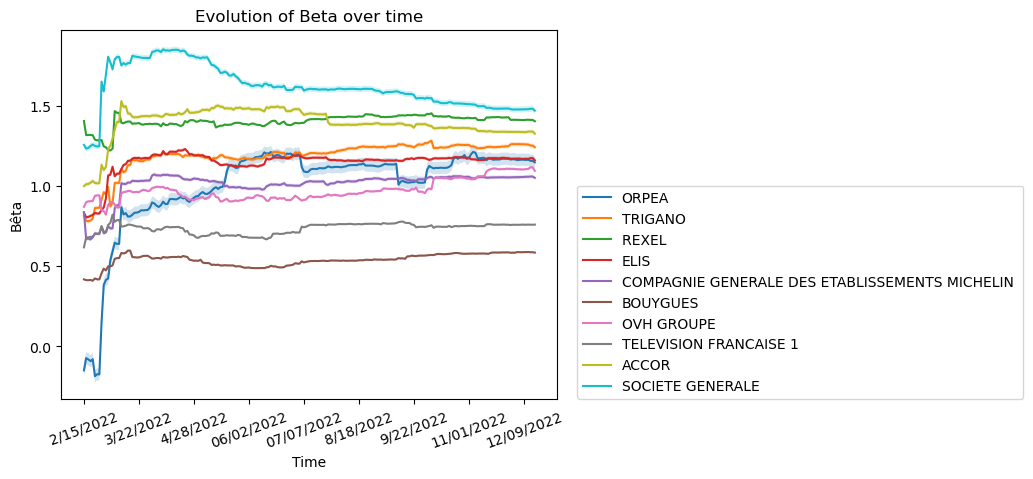

In [23]:
### This graph shows the evolution of all betas in one graph

#Name of the graph and of the axis
plt.title("Evolution of Beta over time")
plt.xlabel("Time")
plt.ylabel('Bêta')
x=dfBetaDateAlea.index

for i in range(NbActionAlea):
    y=dfBetaDateAlea.iloc[:,i]
    #Creation of the bounds of the confidence interval
    ci = 1.96 * np.std(y)/np.sqrt(len(x))
    plt.fill_between(x, (y-ci), (y+ci), alpha=.2)
    plt.plot(x,y,label=NomActionAlea[i])

#Where to display the legend
plt.legend(loc=(1.04, 0))
#Choose the interval of date in the axis
plt.xticks(range(0, NbDate-40, 25),rotation=20)

plt.show()


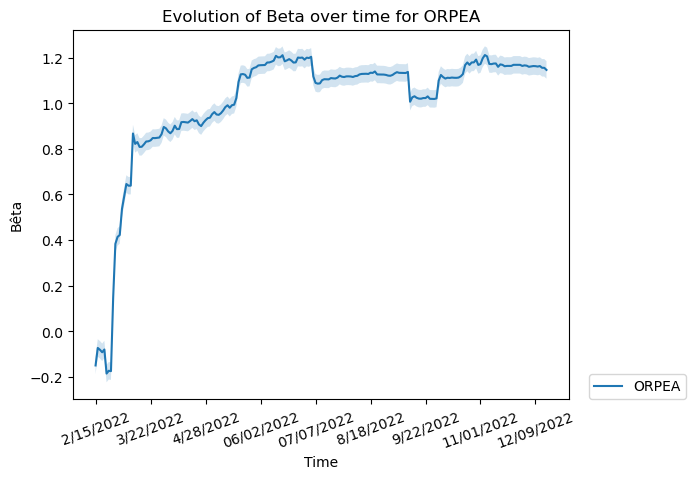

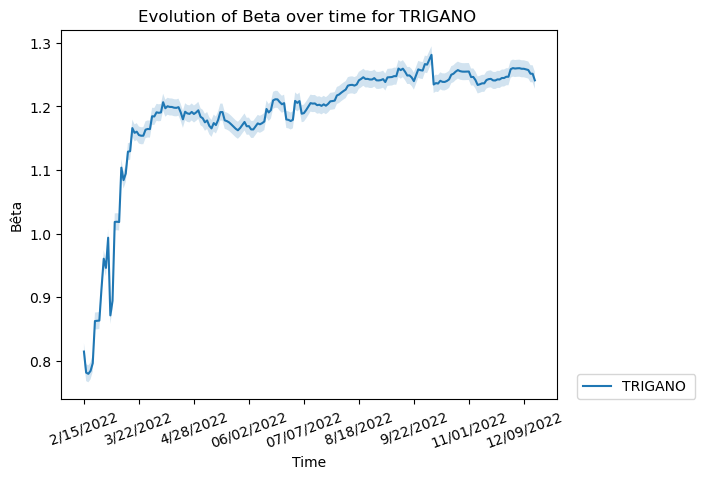

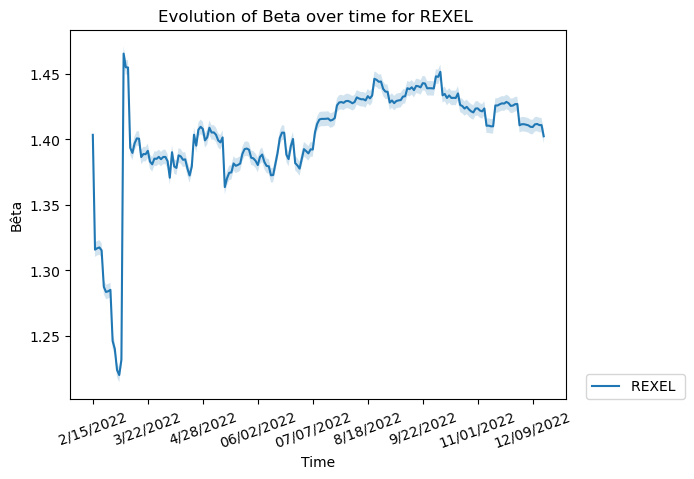

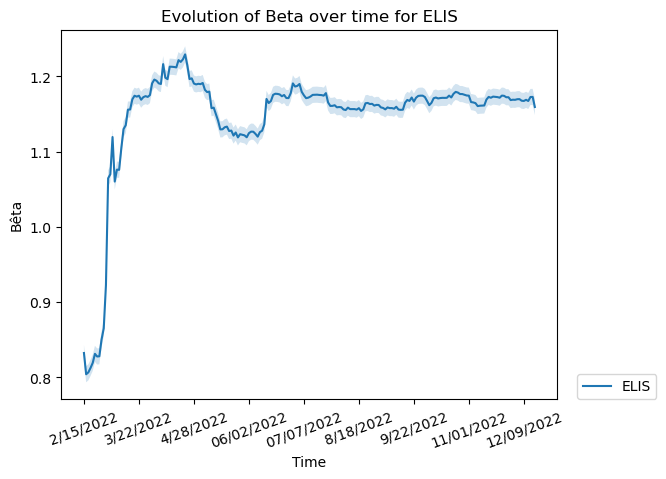

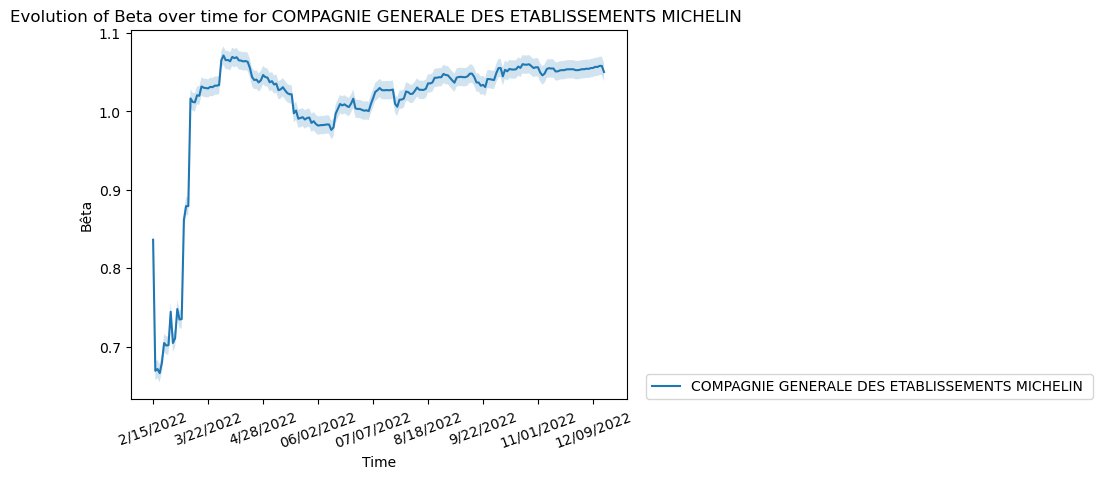

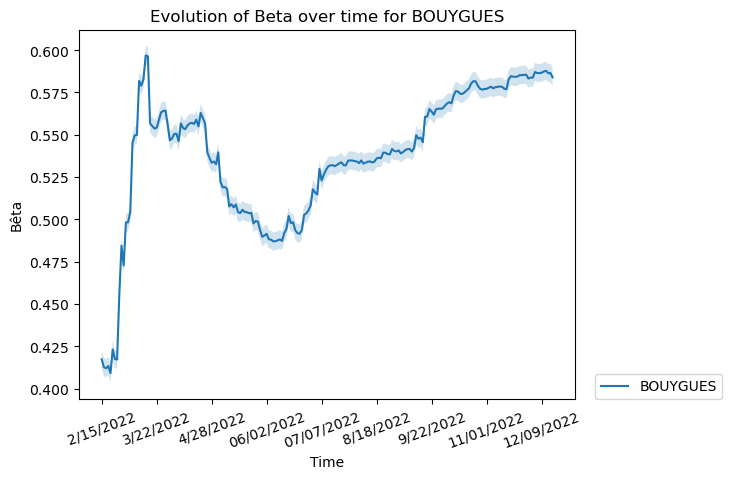

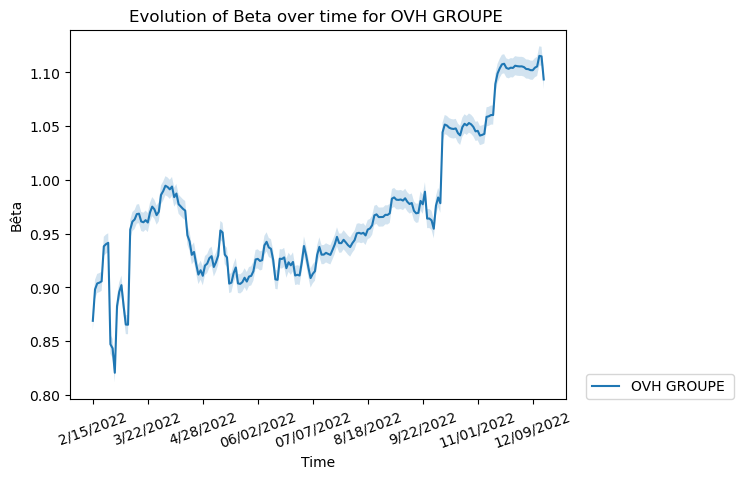

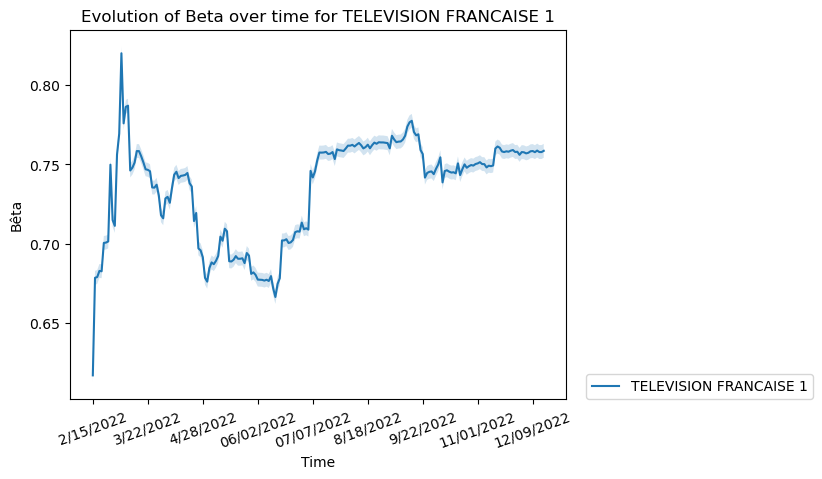

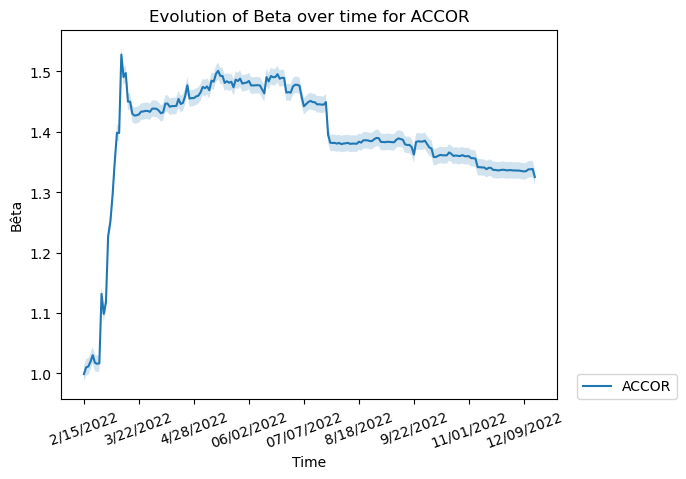

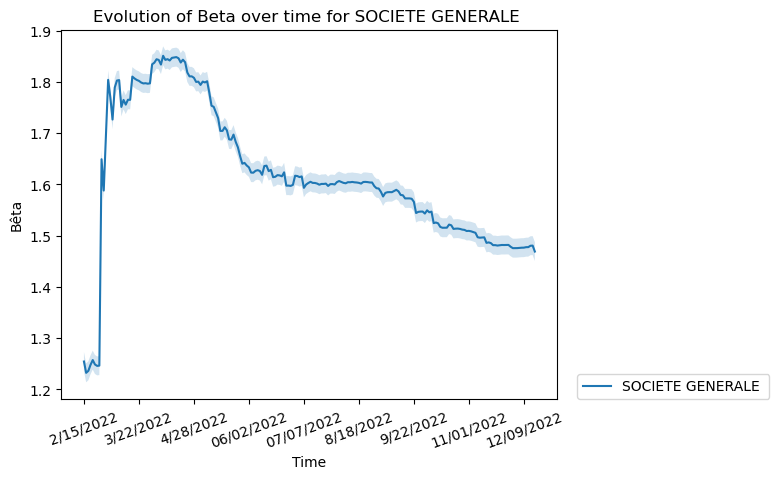

<Figure size 640x480 with 0 Axes>

In [24]:
###Here you can find the evolution of the beta for each stock separately

x=dfBetaDateAlea.index

for i in range(NbActionAlea):
    y=dfBetaDateAlea.iloc[:,i]
    #Creation of the bounds of the confidence interval
    ci = 1.96 * np.std(y)/np.sqrt(len(x))
    
    plt.fill_between(x, (y-ci), (y+ci), alpha=.2)
    plt.plot(x,y,label=NomActionAlea[i])
    plt.title("Evolution of Beta over time for "+NomActionAlea[i])
    plt.xlabel("Time")
    plt.ylabel('Bêta')
    #Where to display the legend
    plt.legend(loc=(1.04, 0))
    #Choose the interval of date in the axis
    plt.xticks(range(0, NbDate-40, 25),rotation=20)
    plt.show()
    plt.clf()

In [25]:
#Creation of the table
StatDateAlea = pd.DataFrame(np.zeros((4,NbActionAlea)))
StatDateAlea.columns = NomActionAlea
StatDateAlea.index = ['Moyenne','Minimum','Maximum','Ecart-type']

In [26]:
#Filling the table
for i in range(NbActionAlea):
    StatDateAlea.iloc[0,i]=dfBetaDateAlea.iloc[:,i].mean()
    StatDateAlea.iloc[1,i]=dfBetaDateAlea.iloc[:,i].min()
    StatDateAlea.iloc[2,i]=dfBetaDateAlea.iloc[:,i].max()
    StatDateAlea.iloc[3,i]=dfBetaDateAlea.iloc[:,i].std()
    
StatDateAlea

,ORPEA,TRIGANO,REXEL,ELIS,COMPAGNIE GENERALE DES ETABLISSEMENTS MICHELIN,BOUYGUES,OVH GROUPE,TELEVISION FRANCAISE 1,ACCOR,SOCIETE GENERALE
Moyenne,1.005321,1.186291,1.402082,1.146906,1.009439,0.538080,0.971215,0.735093,1.391735,1.617253
Minimum,-0.185596,0.779426,1.220059,0.803944,0.666157,0.409170,0.820311,0.616835,0.998928,1.232199
Maximum,1.211579,1.281066,1.465485,1.229207,1.071133,0.596869,1.115477,0.820108,1.527917,1.850706
Ecart-type,0.281641,0.098227,0.040738,0.078706,0.085700,0.039763,0.065298,0.032173,0.100456,0.135743


# Diversifiable and non-diversifiable risk

1. For each of the 50 securities, estimate the regression: rit = αi + βirmt + eit, t = 1,...,T using all
observations.

In [27]:
#Retrieval of calculated Betas from drawn titles
BetaAction = np.zeros((NbAction)) 

#Retrieval of the Alphas calculated from the titles drawn with the fates
AlphaAction = np.zeros((NbAction)) 

#Retrieval of the residual of the title for each date
ResiduAction = np.zeros((NbDate,NbAction))

#Compute the return of the market during the whole period
ReturnMarket = (data_log.iloc[-1,-1:]-data_log.iloc[0,-1:])/data_log.iloc[0,-1:] 
ReturnMarket

SBF 120    0.1276
dtype: float64

In [28]:
#Loop on the number of shares,  we prefer to add all securities of the index rather than to stop at 50
for i in range(NbAction):
    #We assign to y the column of the action i
    y = data_log.iloc[:,i]
    #We assign to x the column of index
    x = data_log.iloc[:,-1:]
    #Addition of a column to the df (necessary for the calculation of the regression constant)
    x=sm.add_constant(x)
    #Regression
    regall=sm.OLS(y,x).fit()
    #Retrieval of the alpha and beta of the title 
    AlphaAction[i], BetaAction[i] = regall.params
    #Retrieval of the residual of the title for each date
    ResiduAction[:,i]=regall.resid
   

In [29]:
ResiduAction

array([[ 0.03078337, -0.00398005,  0.03422264, ...,  0.0146237 ,
         0.0498157 ,  0.01360905],
       [ 0.00980025,  0.00120024,  0.00388462, ..., -0.00521066,
        -0.05768853, -0.00588927],
       [ 0.02063973,  0.00679597,  0.00614852, ...,  0.00310938,
         0.02848229,  0.00188248],
       ...,
       [-0.01143734, -0.0007983 , -0.01140897, ...,  0.01632619,
        -0.01373049, -0.00141651],
       [ 0.02078442,  0.00124654, -0.00874762, ...,  0.01786736,
        -0.0310344 ,  0.01348889],
       [-0.01837627,  0.01635783, -0.02065483, ..., -0.00249549,
        -0.01392698,  0.01782893]])

In [30]:
#Transformation into dataframe and transformation of columns and index 
dfBetaAction = pd.DataFrame(BetaAction) 
dfBetaAction.index=data_log.iloc[:,:-1].columns  
dfBetaAction.rename({0: 'Bêta'}, axis=1, inplace=True)  
dfBetaAction

,Bêta
ACCOR,1.329335
CREDIT AGRICOLE,1.151171
AEROPORTS DE PARIS,0.692701
AIR FRANCE - KLM,1.244105
L'AIR LIQUIDE,0.812478
...,...
VALLOUREC,0.845183
VALNEVA,1.248494
VERALLIA,0.935716
WORLDLINE,1.299610


In [31]:
#Transformation into dataframe and transformation of columns and index 
dfAlphaAction = pd.DataFrame(AlphaAction) 
dfAlphaAction.index=data_log.iloc[:,:-1].columns 
dfAlphaAction.rename({0: 'Alpha'}, axis=1, inplace=True) 
dfAlphaAction


,Alpha
ACCOR,0.000181
CREDIT AGRICOLE,-0.000446
AEROPORTS DE PARIS,0.000717
AIR FRANCE - KLM,-0.004040
L'AIR LIQUIDE,-0.000118
...,...
VALLOUREC,0.001252
VALNEVA,-0.005367
VERALLIA,0.000556
WORLDLINE,-0.000181


In [32]:
StatBeta = pd.DataFrame(np.zeros((6,1))) #dataframe avec les  stat du beta 
StatBeta.columns = ['Bêta']
StatBeta.index = ['Mean','Minimum','Maximum','Standard deviation','Skewness','Kurtosis']

#Filling the table with respective stat
StatBeta.iloc[0,0]=dfBetaAction.iloc[:,0].mean()
StatBeta.iloc[1,0]=dfBetaAction.iloc[:,0].min()
StatBeta.iloc[2,0]=dfBetaAction.iloc[:,0].max()
StatBeta.iloc[3,0]=dfBetaAction.iloc[:,0].std()
StatBeta.iloc[4,0]=dfBetaAction.iloc[:,0].skew()
StatBeta.iloc[5,0]=dfBetaAction.iloc[:,0].kurtosis()
StatBeta

,Bêta
Mean,0.985922
Minimum,-0.017318
Maximum,2.172776
Standard deviation,0.362952
Skewness,-0.057735
Kurtosis,0.598467


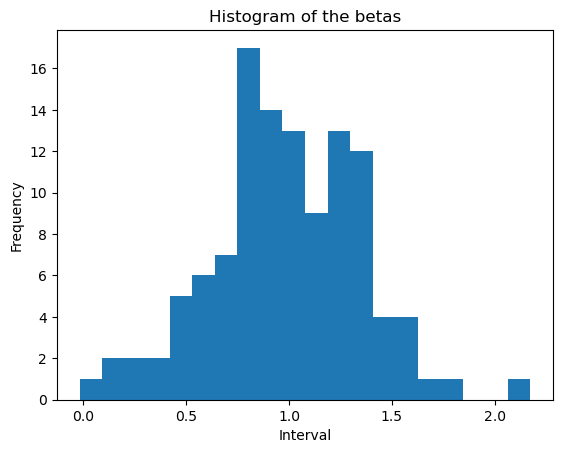

In [33]:
#Creation of a histogram in order to visualise the distribution of the betas
plt.hist(dfBetaAction, bins=20)

# Ajout d'un titre et d'étiquettes pour les axes
plt.title("Histogram of the betas")
plt.xlabel("Interval")
plt.ylabel("Frequency")

# Affichage de l'histogramme
plt.show()

In [34]:
#Nous allons reprendre les 10 actions prises au hasard plus tôt dans le code#

RiskPtf = pd.DataFrame(np.zeros((1,2))) 
RiskPtf.columns = ['non-diversifiable risk','diversifiable risk']
RiskPtf.iloc[0,0]=(BetaActionAlea.mean()**2)*(data_log.iloc[:,-1:].std())**2
RiskPtf.iloc[0,1]=(1/(NbActionAlea)**2)*VarianceResidu.sum()
RiskPtf

,non-diversifiable risk,diversifiable risk
0,0.000119,0.000071



4. For each portfolio of N = 11,12,13....,99,100 securities obtained by adding one by one each security to the initial portfolio, calculate:
• itsβp
• its non-diversifiable risk and its diversifiable risk.



Initialisation des matrices récupérants les bêtas et les risque diversifiables et non diversifiables au fil du temps

In [35]:
#Retrieval of Betas by adding a title each time 
BetaActionPtf = np.zeros((NbAction - NbActionAlea))
AlphaActionPtf = np.zeros((NbAction - NbActionAlea))
RisqueDiversPtf = np.zeros((NbAction - NbActionAlea))
RisqueNonDiversPtf = np.zeros((NbAction - NbActionAlea))
RisqueTotal = np.zeros((NbAction - NbActionAlea))
VarianceResidu2=VarianceResidu
NombreDispo2 = NombreDispo

In [36]:
#Compute the Return of the market for the whole period
ReturnMarket = (data_log.iloc[-1,-1:]-data_log.iloc[0,-1:])/data_log.iloc[0,-1:]
ReturnMarket

SBF 120    0.1276
dtype: float64

In [37]:
#We compute the variance of the return of the index SBF 120
VarMarche = data_log.iloc[:,-1:].std()
#We count the number of stock we have to add to our portfolio
NbActionAjoute = NbAction - NbActionAlea
NbActionPtf = NbActionAlea

#We first loop on the titles that we have to add, we prefer to add all securities of the index rather than to stop at 50
for i in range(NbActionAjoute):
    NbActionPtf = NbActionPtf + 1
    #We choose a number that has not yet been drawn
    NbAlea = random.choice(NombreDispo2)
    #We remove this number from the list of number we can choose
    NombreDispo2.remove(NbAlea)
    
    #We add to Alpha and Beta list, the alpha and the beta of the selected title
    AlphaActionAlea = np.append(AlphaActionAlea,dfAlphaAction.iloc[NbAlea])
    BetaActionAlea= np.append(BetaActionAlea,dfBetaAction.iloc[NbAlea])
    
    #We can now compute the beta of the portfolio...
    BetaActionPtf[i]=BetaActionAlea.mean()
    AlphaActionPtf[i]=AlphaActionAlea.mean()
    #... In order to compute the new Non diversifiable risk
    RisqueNonDiversPtf[i]= (BetaActionPtf[i]**2)*(VarMarche**2)
    
    #We add to the Residual variance list, the variance of the residual of the selected title...
    VarianceResidu2=np.append(VarianceResidu2,np.var(ResiduAction[:, i]))
    #... In order to compute the new diversifiable risk
    RisqueDiversPtf[i]=(1/(NbActionPtf)**2)*VarianceResidu2.sum()
    
    #Finally we can sum the two risks
    RisqueTotal[i]= RisqueDiversPtf[i] + RisqueNonDiversPtf[i]
    

    

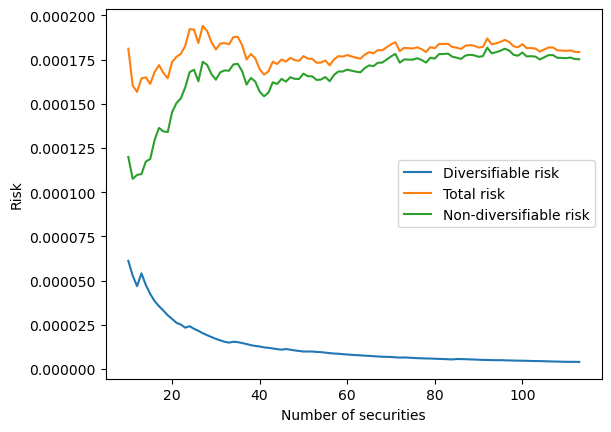

In [38]:
#We plot the evolution of the three risks over the number of stock in our portfolio

plt.plot(range(NbActionAlea, NbAction), RisqueDiversPtf, label="Diversifiable risk")
plt.plot(range(NbActionAlea, NbAction), RisqueTotal, label="Total risk")
plt.plot(range(NbActionAlea, NbAction), RisqueNonDiversPtf, label="Non-diversifiable risk")
plt.xlabel("Number of securities")
plt.ylabel("Risk")
plt.legend()
plt.show()

This graph is a little bit disappointing because the diversifable risk decrease but when we begin at 10 stocks in our portfolio, this risk is already diluted. So maybe we have to restart our portfolio fromù scratch to really see the importance of the decrease of this risk

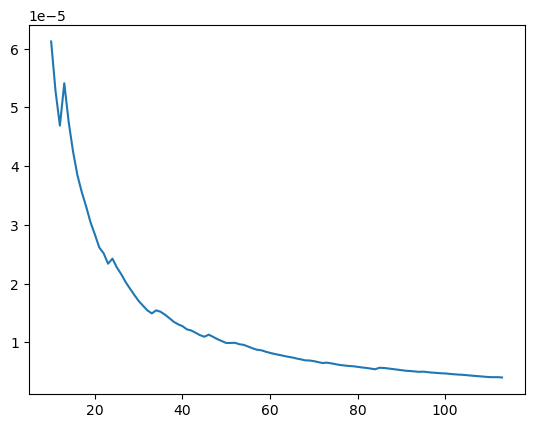

In [39]:
#Here we focus on the diversifiable risk because it's very small in front of the non diversifiable
plt.plot(range(NbActionAlea, NbAction), RisqueDiversPtf, label="Diversifiable risk")
plt.show()

So we will now, repeat the same process with few modifications to create a new portfolio and see clearly the importance of the diversification

In [40]:
#Retrieval of Betas by adding a title each time 
BetaActionPtf = np.zeros((NbAction))
AlphaActionPtf = np.zeros((NbAction))
RisqueDiversPtf = np.zeros((NbAction))
RisqueNonDiversPtf = np.zeros((NbAction))
RisqueTotal = np.zeros((NbAction))
VarianceResidu2=np.zeros((0))
NombreDispo2 = list(range(NbAction))

In [41]:
#We compute the variance of the return of the index SBF 120
VarMarche = data_log.iloc[:,-1:].std()
#We count the number of stock we have to add to our portfolio
NbActionAjoute = NbAction
NbActionPtf = 0

#We first loop on the titles that we have to add
for i in range(NbAction):
    NbActionPtf = NbActionPtf + 1
    #We choose a number that has not yet been drawn
    NbAlea = random.choice(NombreDispo2)
    #We remove this number from the list of number we can choose
    NombreDispo2.remove(NbAlea)
    
    #We add to Alpha and Beta list, the alpha and the beta of the selected title
    AlphaActionAlea = np.append(AlphaActionAlea,dfAlphaAction.iloc[NbAlea])
    BetaActionAlea= np.append(BetaActionAlea,dfBetaAction.iloc[NbAlea])
    
    #We can now compute the beta of the portfolio...
    BetaActionPtf[i]=BetaActionAlea.mean()
    AlphaActionPtf[i]=AlphaActionAlea.mean()
    #... In order to compute the new Non diversifiable risk
    RisqueNonDiversPtf[i]= (BetaActionPtf[i]**2)*(VarMarche**2)
    
    #We add to the Residual variance list, the variance of the residual of the selected title...
    VarianceResidu2=np.append(VarianceResidu2,np.var(ResiduAction[:, i]))
    #... In order to compute the new diversifiable risk
    RisqueDiversPtf[i]=(1/(NbActionPtf)**2)*VarianceResidu2.sum()
    
    #Finally we can sum the two risks
    RisqueTotal[i]= RisqueDiversPtf[i] + RisqueNonDiversPtf[i]
    

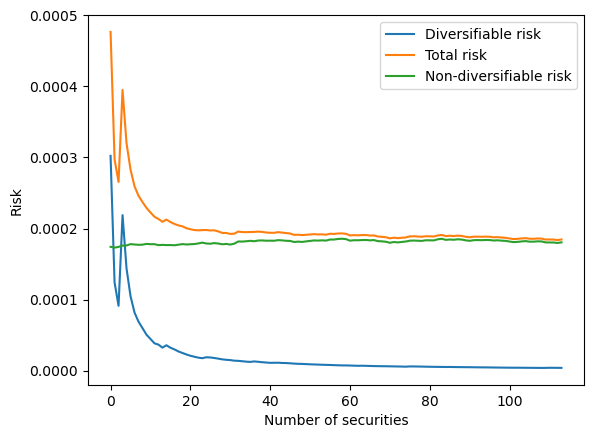

In [42]:
plt.plot(range(NbAction), RisqueDiversPtf, label="Diversifiable risk")
plt.plot(range(NbAction), RisqueTotal, label="Total risk")
plt.plot(range(NbAction), RisqueNonDiversPtf, label="Non-diversifiable risk")
plt.xlabel("Number of securities")
plt.ylabel("Risk")
plt.legend()
plt.show()

Conclusion : As we can see on the graph, the diversifiable risk decreases with the number of securities in the portfolio while the non-diversifiable risk is constant and does not depend of the number of securities in the portfolio. 
So it is more interesting to diversify one's portfolio in order to minimize the diversifiable risk and therefore to minimize the total risk.